# Transfer Learning

## Import Packages

In [1]:
# !pip uninstall ml_project_util -y
!pip install git+https://github.com/aris-gk3/ml_project_util.git
# or for local development:
# %pip uninstall ml_project_util -y
# %pip install git+https://github.com/aris-gk3/ml_project_util.git

import tensorflow as tf # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# My package imports
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head
from ml_project_util.model_evaluation import model_evaluation_precise
from ml_project_util.history import concatenate_json, plot_json

  Cloning https://github.com/aris-gk3/ml_project_util.git to /tmp/pip-req-build-6os2c8gq
  Running command git clone --filter=blob:none --quiet https://github.com/aris-gk3/ml_project_util.git /tmp/pip-req-build-6os2c8gq
  Resolved https://github.com/aris-gk3/ml_project_util.git to commit d7efaad36089c8469c6c2e13af236643ac518494
  Preparing metadata (setup.py) ... done
  Created wheel for ml_project_util: filename=ml_project_util-0.1-py3-none-any.whl size=22709 sha256=223d1cc8db4c6894ef90906bba87129843c76a938d9820c8ed741e9bdf0a72bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-cdic6nsb/wheels/9b/33/7a/e8e8f55a4c6aa39df26369c48b9e3497c6dde4c7663912f8ef
Successfully built ml_project_util


2025-06-16 17:48:12.087779: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750096092.295633      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750096092.350133      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Define Variable Paths

In [2]:
dict = path_definition(ds_rel_path='catsdogsconv/CatsDogs') # path_definition.config to read
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

ds_rel_path set to: catsdogsconv/CatsDogs


## Define the Model

In [3]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(1, activation='sigmoid'))

I0000 00:00:1750096107.138489      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d (GlobalAveragePooling2D), Trainable: False
- dense (Dense), Trainable: False
- dropout (Dropout), Trainable: False
- dense_1 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainable: Fal

I0000 00:00:1750096138.659927      95 service.cc:148] XLA service 0x7aa47000d570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750096138.660815      95 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750096139.052932      95 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/532 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.4375 - loss: 2.7125   

I0000 00:00:1750096147.380803      95 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


532/532 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.9038 - loss: 0.3239
Epoch 1: saving model to /kaggle/working/SavedModels/CD1/CD1_P1_001_val0.0569.keras
532/532 ━━━━━━━━━━━━━━━━━━━━ 275s 495ms/step - accuracy: 0.9038 - loss: 0.3236 - val_accuracy: 0.9802 - val_loss: 0.0569
Epoch 2/25
531/532 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.9584 - loss: 0.1191
Epoch 2: saving model to /kaggle/working/SavedModels/CD1/CD1_P1_002_val0.0432.keras
532/532 ━━━━━━━━━━━━━━━━━━━━ 256s 481ms/step - accuracy: 0.9584 - loss: 0.1191 - val_accuracy: 0.9861 - val_loss: 0.0432
Epoch 3/25
531/532 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.9663 - loss: 0.0890
Epoch 3: saving model to /kaggle/working/SavedModels/CD1/CD1_P1_003_val0.0421.keras
532/532 ━━━━━━━━━━━━━━━━━━━━ 257s 482ms/step - accuracy: 0.9663 - loss: 0.0890 - val_accuracy: 0.9866 - val_loss: 0.0421
Epoch 4/25
531/532 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.9705 - loss: 0.0777
Epoch 4: saving model to /kaggle/working/Sav

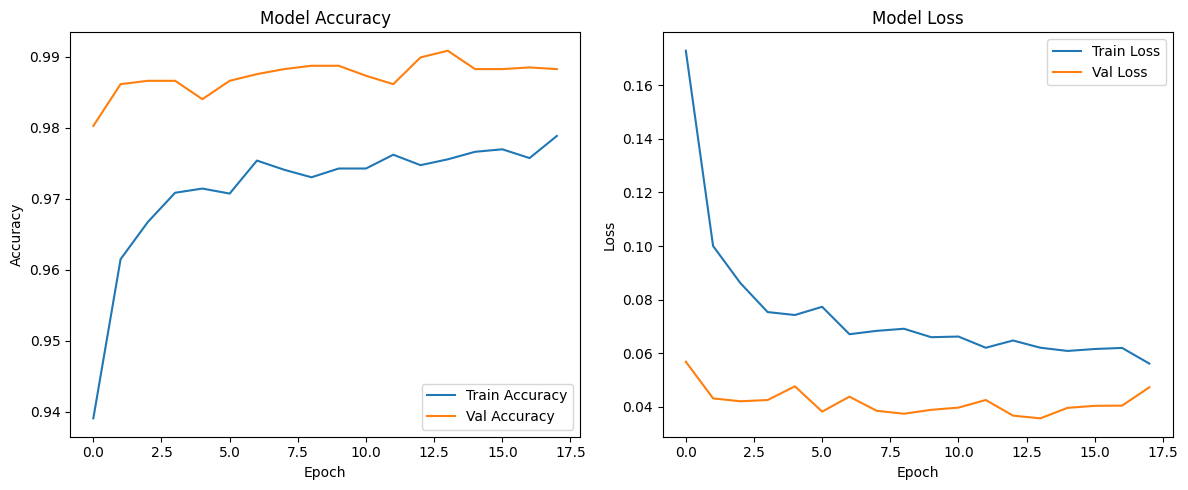

In [4]:
model_name = 'CD1_P1'
epochs = 25
lr = 1e-3
optimizer = 'Adam'

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),  # 10% random rotation
    layers.RandomZoom(0.1),      # 10% zoom
    layers.RandomTranslation(0.1, 0.1),  # Random height and width shift
    layers.RandomBrightness(0.2)
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, model_name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [5]:
model_evaluation_precise(model)

Found 3748 files belonging to 2 classes.
Start evaluating batches
Batch Number: 117
Precise test accuracy: 0.98693
Precise test loss: 0.05439


(0.9869264, 0.0543879166855827)

In [6]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(1, activation='sigmoid'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

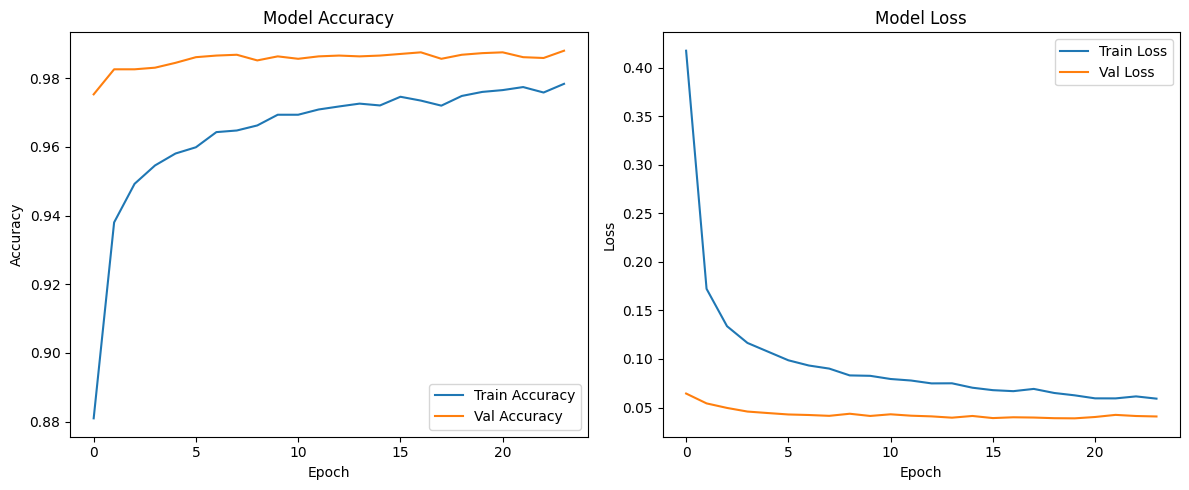

In [7]:
epochs = 30
lr = 1e-4
optimizer = 'Adam'
name = 'CD1_P2'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [8]:
model_evaluation_precise(model)

Found 3748 files belonging to 2 classes.
Start evaluating batches
Batch Number: 117
Precise test accuracy: 0.98479
Precise test loss: 0.04602


(0.9847919, 0.046021446666994745)

In [9]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))       
model.add(layers.Dense(1, activation='sigmoid'))

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_2 (GlobalAveragePooling2D), Trainable: False
- dense_4 (Dense), Trainable: False
- dropout_2 (Dropout), Trainable: False
- dense_5 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

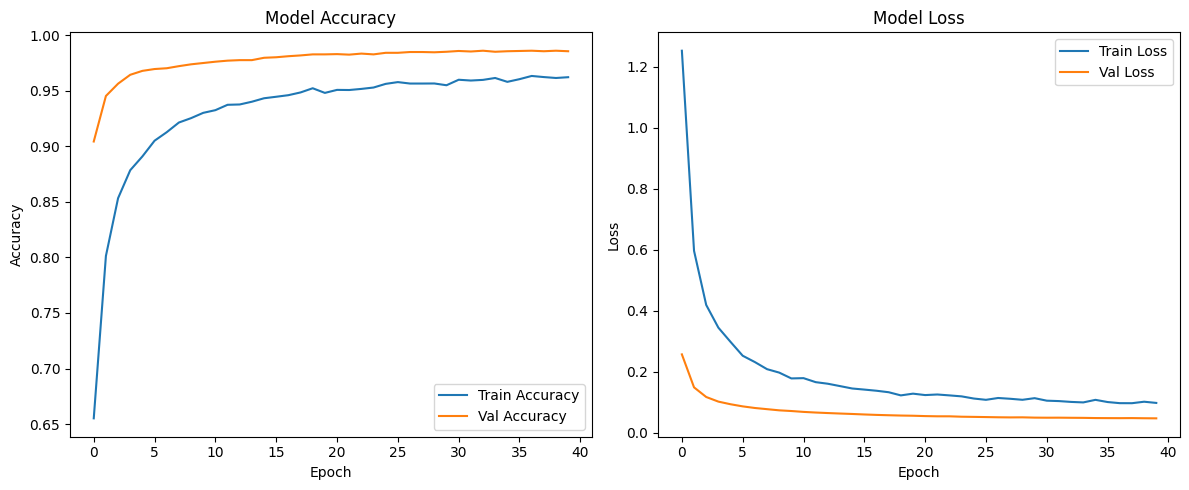

In [10]:
epochs = 40
lr = 1e-5
optimizer = 'Adam'
name = 'CD1_P3'
freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [11]:
model_evaluation_precise(model)

Found 3748 files belonging to 2 classes.
Start evaluating batches
Batch Number: 117
Precise test accuracy: 0.98372
Precise test loss: 0.04312


(0.98372465, 0.043123103570300414)

## Interactively Train the Model

In [12]:
# vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# model = models.Sequential()
# for layer in vgg_base.layers:
#     model.add(layer)
# # Adding the new head (CD2 old)
# model.add(layers.GlobalAveragePooling2D())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))       
# model.add(layers.Dense(1, activation='sigmoid'))

# # # CD4 old
# # layers.GlobalAveragePooling2D(),
# # layers.Dense(512, activation='relu'),
# # layers.Dropout(0.5),
# # layers.Dense(256, activation='relu'),
# # layers.Dropout(0.3),
# # layers.Dense(1, activation='sigmoid') 

In [13]:
# model_name1 = 'CD1_P1'
# epochs = 25
# lr = 1e-3
# optimizer = 'Adam'

# # data_augmentation = tf.keras.Sequential([
# #     layers.RandomFlip("horizontal"),
# #     layers.RandomRotation(0.1),
# #     layers.RandomZoom(0.1),
# #     layers.RandomContrast(0.1)
# # ], name="data_augmentation")

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip('horizontal'),
#     layers.RandomRotation(0.1),  # 10% random rotation
#     layers.RandomZoom(0.1),      # 10% zoom
#     layers.RandomTranslation(0.1, 0.1),  # Random height and width shift
#     layers.RandomBrightness(0.2)
# ])

# freeze_layers(model, verbose=1)
# unfreeze_head(model, verbose=1)
# train(model, epochs, lr, optimizer, model_name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation, early_stopping=True)

In [14]:
# model_evaluation_precise(model)

In [15]:
# model_name2 = 'CD1_P1_2'
# epochs = 5
# train(model, epochs, lr, optimizer, model_name, is_binary=1, plot=True, augmentation=data_augmentation)

In [16]:
# relpath1 = f"{PATH_RAWDATA}/{model_name1}.json"
# relpath2 = f"{PATH_RAWDATA}/{model_name2}.json"
# output_filename = f"{model_name1}_a"
# concatenate_json(relpath1, relpath2, output_filename)
# plot_json(json_name=output_filename, img_name=output_filename, data_type='joined')

In [17]:
# model_evaluation_precise(model)